# Heart Disease Prediction

## Task Description
Using patient data that is given in the dataset <a href="./data_heart_disease.csv">data_heart_disease.csv</a>, I will build machine learning models to predict whether a patient has heart disease, or not, based on the appropriate input features from the dataset.
The sections have been broken down into three topics:

1. The first section relates to exploratory analysis and pre-processing of the data.
2. The second section involves building a decision tree model for predicting whether or not someone has heart disease.
3. The third section is about neural networks where you should build an ANN for the same classification exercise.



<div class="alert alert-success" style="text-align:left;"><h2>1. Exploratory Analysis and Pre-processing<span style="float:right;"></span></h2></div>

This section concerns analysing and pre-processing the dataset.

<h3 style="text-alight:left;"> 1a. <span style="float:right;"></span> </h3>

Import all the relevent packages that are needed for running your code in all parts of section 1, and load the dataset from `data_heart_disease.csv` into a pandas DataFrame named `data`.

#### 1a. Code

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data_heart_disease.csv')

You should now be able to view the dataset by running the code cell below.

In [5]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HRMaxGap,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,8,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,15,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,85,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,64,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,43,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,11,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,48,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,-11,1


<h3 style="text-alight:left;"> 1b. <span style="float:right;"></span> </h3>

Produce a suitable plot to show which age group in the dataset has the largest sample size.
Here, an age group should be defined every 10 years; for example ages 30-40, 40-50, etc.

The plot should be clearly labelled and you should write down which age group has the largest sample size (e.g. age group 90-100).

#### 1b. Code

<AxesSubplot:xlabel='Age', ylabel='Frequency'>

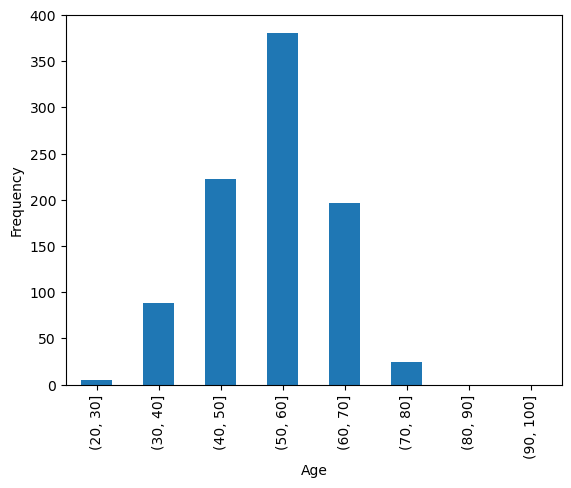

In [4]:
grouped = pd.cut(data["Age"], bins=range(20,110,10))
data_ageGroup = data.groupby(grouped)["Age"].count()
plt.ylabel("Frequency")
data_ageGroup.plot(kind="bar")


#### 1b. Answer

50-60

<h3 style="text-alight:left;"> 1c. <span style="float:right;"></span> </h3>

Report the number of patients in the most populous age group. Write the answer that you obtain in the markdown cell.

#### 1c. Code

In [7]:
print("There are " + str(data_ageGroup.max()) +" patients in the most populous group.")

There are 381 patients in the most populous group.


#### 1c. Answer

381

<h3 style="text-alight:left;"> 1d. <span style="float:right;"></span> </h3>

How does the prevalence of heart disease compare in the data between the two sexes?

Find this data and enter your findings in the markdown cell. Your answer should contain some relevent statistic to show how they compare rather than just stating "Sex *** has the highest prevalence of heart disease". 

#### 1d. Code

In [8]:
#sexGroups = data.groupby('Sex')["HeartDisease"].sum()#

#get data sets for sexes
menData = data[data["Sex"]=="M"]
womenData = data[data["Sex"]=="F"]

#get number of each sex
numMen = len(menData)
numWomen = len(womenData)

#get men with heart disease then %
hdMen = menData.groupby("HeartDisease")["HeartDisease"].count()
percentM = ((hdMen[1]/numMen)*100).round(2)
#get women with heart disease then %
hdWomen = womenData.groupby("HeartDisease")["HeartDisease"].count()
percentF = ((hdWomen[1]/numWomen)*100).round(2)


print("The percentage of Men with Heart Disease: " + str(percentM) + "%")
print("The percentage of Women with Heart Disease: " + str(percentF) + "%")

if percentM>percentF:
    print("There are proprtionally more men with heart disease.")
else:
    print("There are proportionally more women with heart disease.")


The percentage of Men with Heart Disease: 63.17%
The percentage of Women with Heart Disease: 25.91%
There are proprtionally more men with heart disease.


#### 1d. Answer

The percentage of Men with Heart Disease: 63.17%.
The percentage of Women with Heart Disease: 25.91%.

There are proportionally more men with heart disease.

<h3 style="text-alight:left;"> 1e. <span style="float:right;"></span> </h3>

Create a suitable plot which illustrates the ranges of each of the numerical features in the dataset. 
You should report which feature has the largest range in the markdown cell beneath ***1e. Answer***, stating its range. For example, feature A has the largest range with a range of 50.

#### 1e. Code

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HRMaxGap,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,26.891421,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,22.663521,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,-29.000000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,9.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,25.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,42.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,100.000000,1.000000


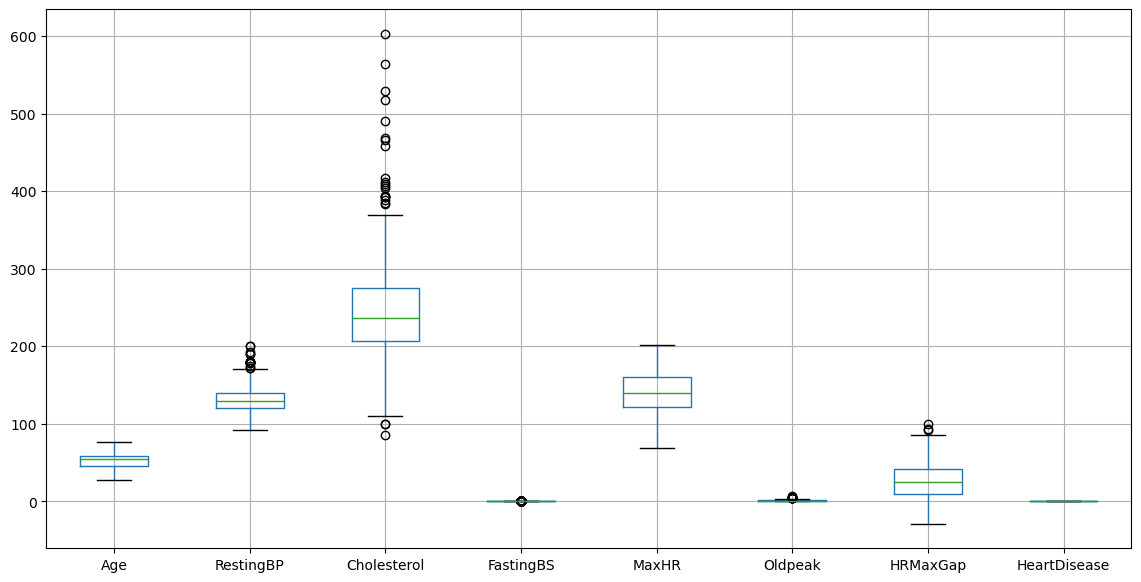

In [9]:
numerical = data
numerical = numerical.drop(columns=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope",])
numerical = numerical.dropna()
BP = numerical.boxplot(figsize=(14,7))

numerical.describe(include='all')


#### 1e. Answer

Cholesterol has the highest range with a range of 518.

<h3 style="text-alight:left;"> 1f. <span style="float:right;"></span> </h3> 

This section has two parts.

**Part I:** Do any features have missing values? Use appropriate functions on the dataframe to find this out, and write your code in the cell ***1f. Part I Code***. In the markdown cell ***1f. Part I Answer***, write down which features (if any) have missing values.

#### 1f. Part I Code

In [10]:
#dropped = data.dropna()

for column in data:
    dropped = data[column].dropna()
    
    if len(data[column])>len(dropped):
        print("'" + column + "' has " + str(len(data[column]) - len(dropped)) + " missing values.")
    elif len(data[column])==len(dropped):
        print("")
    else:
        print("ERROR")
        




'RestingBP' has 1 missing values.
'Cholesterol' has 172 missing values.










#### 1f. Part I Answer

'RestingBP' has 1 missing values.
'Cholesterol' has 172 missing values.

**Part 2:** Use an appropriate technique to handle any missing values in the data. Your code should be written in the cell ***1f. Part II Code***. Write a brief explanation of why you chose this method in the markdown cell ***1f. Part II Answer***.

#### 1f. Part II Code

In [11]:
#fillna() fills the empty values with()

data['RestingBP'] = data['RestingBP'].fillna(data['RestingBP'].median())
data['Cholesterol'] = data['Cholesterol'].fillna(data['Cholesterol'].median())

data

#data = data.dropna()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HRMaxGap,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,8,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,15,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,85,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,64,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,43,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,11,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,48,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,-11,1


#### 1f. Part II Answer

Since we have no information on what the missing values may be, relacing them with the median is the best option, as it will preserve the range and the median itself (whereas replacing with 0 or other static values will not).

Removing the partial rows entirely will handle missing values and is an alternate option, but this will reduce the size of the data set, in this case massively (dropping nearly 150 rows).

<h3 style="text-alight:left;"> Question 1g. <span style="float:right;"></span> </h3>

This section has two parts.

**Part I:** Which features in the heart disease data are categorical? You should use appropriate functions on the dataframe to find this out, and write your code in the cell ***1g. Part I Code***. In the markdown cell ***1g. Part I Answer***, write down which features are categorical.

#### 1g. Part I Code

In [12]:
data.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


#### 1g. Part I Answer

Sex, ChestPainType, RestingECG, ExerciseAngina, and ST_Slope are all categorical.

**Part II:** Use an appropriate technique to transform the categorical features so that they are suitable for training a machine learning model. Your code should be written in the cell ***1g. Part II Code***. In the markdown cell ***1g. Part II Answer***, give the name of the preprocessing technique you used and briefly explain how this transforms the data.

#### 1g. Part II Code

In [13]:
data = pd.get_dummies(data)
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HRMaxGap,HeartDisease,Sex_F,Sex_M,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,8,0,0,1,...,0,0,0,1,0,1,0,0,0,1
1,49,160.0,180.0,0,156,1.0,15,1,1,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283.0,0,98,0.0,85,0,0,1,...,0,0,0,0,1,1,0,0,0,1
3,48,138.0,214.0,0,108,1.5,64,1,1,0,...,0,0,0,1,0,0,1,0,1,0
4,54,150.0,195.0,0,122,0.0,44,0,0,1,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,43,1,0,1,...,0,1,0,1,0,1,0,0,1,0
914,68,144.0,193.0,1,141,3.4,11,1,0,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130.0,131.0,0,115,1.2,48,1,0,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130.0,236.0,0,174,0.0,-11,1,1,0,...,0,0,1,0,0,1,0,0,1,0


#### 1g. Part II Answer

One-hot encoding creates a new binary column for each unique category (every possible value) of the feature, rather than a single categorical column. Since there are only a few values for each categorical feature, this is appropriate.

<h3 style="text-alight:left;"> 1h. <span style="float:right;"></span> </h3>

Are there any further preprocessing steps required to prepare the data for building the machine learning models in Sections 2 and 3? For any additional steps you identify, you should:
* Write the code below the ***1h. Code*** heading. You can add as many code cells as you need.
* In the ***1h. Answer*** markdown cell, write a brief **description** of what you have done and a brief justification of **why** you have done it.

#### 1h. Code

In [14]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(data)
arr = norm.transform(data) # transform the data using the scaler
data = pd.DataFrame(arr, columns=data.columns) # create a dataframe from the scaled array
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HRMaxGap,HeartDisease,Sex_F,Sex_M,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,...,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.520630,0.437818,0.305415,0.233115,0.540911,0.396291,0.425215,0.553377,0.210240,0.789760,...,0.221133,0.050109,0.204793,0.601307,0.193900,0.595861,0.404139,0.068627,0.501089,0.430283
std,0.192502,0.149918,0.103091,0.423046,0.179298,0.121201,0.170513,0.497414,0.407701,0.407701,...,0.415236,0.218289,0.403770,0.489896,0.395567,0.490992,0.490992,0.252957,0.500271,0.495386
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,0.333333,0.249035,0.000000,0.422535,0.295455,0.289855,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.530612,0.416667,0.293436,0.000000,0.549296,0.363636,0.420290,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.653061,0.500000,0.351351,0.000000,0.676056,0.465909,0.543478,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 1h. Answer

We need to scale the features so they all have the same range, since some machine learning models may be sensitive to the features' scales. 
We return a numPy array, and then recreate the dataframe to be scaled at a range of 0-1 (as shown in the describe table).

<div class="alert alert-success" style="text-align:left;"><h2>2. Decision Trees<span style="float:right;"></span></h2></div>

This section concerns building and evaluating a decision tree using `sklearn`.

<h3 style="text-alight:left;"> 2a. <span style="float:right;"></span> </h3>

Build a decision tree in the code cell beneath the heading ***2a. Code*** to predict the presence of heart disease in a patient and call it `tree_d`. 
In the markdown cell beneath the heading ***2a. Answer***, briefly explain the parameters and values that you chose in the function calls used to build the decision tree, and explain what input features and target output/labels you used in the training.

#### 2a. Code

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

# split into training and test sets - we need training one for now
y = data['HeartDisease'] # the class labels 
X = data.drop('HeartDisease',axis=1) # the input features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

#now train a decision tree
tree_d = DecisionTreeClassifier(max_depth=4,random_state=1)
tree_d.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

#### 2a. Answer

In train_test_split, which randomly shuffles the data, the random_state parameter specifies the seed of the random number generator; this makes our results reproducible, since the same series of "random" numbers will be produced each time. The X and y parameters specify the input features - i.e. everything except HeartDisease - and class labels of the data respectively, and the test_size parameter is set to 0.3.

In DecisionTreeClassifier, max_depth limits how many levels are allowed in the tree, and random_state once again setsthe seed to 1.

In tree_d.fit, we then parse in the training data from the split.

<h3 style="text-alight:left;"> 2b. <span style="float:right;"></span> </h3>

Write some code in the code cell beneath the heading ***2b. Code*** to evaluate the decision tree model that you built. Your code should `print` out the accuracy of the model for correctly classifying whether patients have or do not have heart disease. 

#### 2b. Code

In [16]:
y_predict = tree_d.predict(X_test) # use our trained tree to predict labels for the test data
print('Testing accuracy: \t', metrics.accuracy_score(y_test, y_predict)) # calculate the accuracy by comparing the true labels (y_test) to the predicted labels (y_predict)

Testing accuracy: 	 0.8442028985507246


<h3 style="text-alight:left;"> 2c. <span style="float:right;"></span> </h3>

Using a confusion matrix, analyse and report the accuracy of the decision tree that you trained. 
You should write your code in the code cell beneath the heading ***2c. Code***, and use the markdown cell beneath the heading ***2c. Answer*** to report, with reference to your confusion matrix, which class your decision tree model is better at classifying.

#### 2c. Code

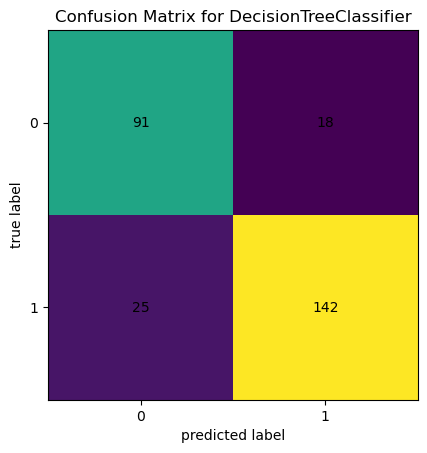

In [17]:
cm = metrics.confusion_matrix(y_test,y_predict)

# Plot the Confusion Matrix
def cf_matrix(mat, t_name, model_name):
    
    fig, ax = plt.subplots()
    im = ax.imshow(mat)
    
    ax.set_xticks(range(0,len(t_name)))
    ax.set_yticks(range(0,len(t_name)))
    ax.set_xticklabels(t_name)
    ax.set_yticklabels(t_name)

    for i in range(0,len(t_name)):
        for j in range(0,len(t_name)):
            text = ax.text(j, i, mat[i, j], ha="center", va="center", color="k")
    
    plt.ylabel('true label')
    plt.xlabel('predicted label')
    plt.title(f"Confusion Matrix for {model_name}")
    
cf_matrix(cm,[0,1],'DecisionTreeClassifier')

#### 2c. Answer

Based on the confusion matrix, the tree is better at predicting heart disease (85.03% accurate, since it only missclassified 25 and correctly classified 142), than no heart disease (83.49% accurate, as it misclassified 18 and only correctly predicted 91).

<h3 style="text-alight:left;"> 2d. <span style="float:right;"></span> </h3>

Write the code in the code cell beneath the heading ***2d. Code*** to draw your trained decision tree.

***There are two parts of this section for the analysis:***

In part I, use your plot to analyse your trained decision tree and comment in the markdown cell beneath the heading ***2d. Part I Answer*** on what the three most important features are that are used to predict the presence of heart disease.

In part II, extract a list of rule(s) from your decision tree plot that can be used to classify people with or without heart disease, and write these into the markdown cell beneath the heading ***2d. Part II Answer***.

#### 2d. Code

[Text(0.5267857142857143, 0.9, 'ST_Slope_Up <= 0.5\ngini = 0.498\nsamples = 642\nvalue = [301, 341]\nclass = Heart Disease'),
 Text(0.2857142857142857, 0.7, 'MaxHR <= 0.637\ngini = 0.311\nsamples = 353\nvalue = [68, 285]\nclass = Heart Disease'),
 Text(0.14285714285714285, 0.5, 'Sex_M <= 0.5\ngini = 0.234\nsamples = 296\nvalue = [40, 256]\nclass = Heart Disease'),
 Text(0.07142857142857142, 0.3, 'ExerciseAngina_N <= 0.5\ngini = 0.482\nsamples = 37\nvalue = [15, 22]\nclass = Heart Disease'),
 Text(0.03571428571428571, 0.1, 'gini = 0.351\nsamples = 22\nvalue = [5, 17]\nclass = Heart Disease'),
 Text(0.10714285714285714, 0.1, 'gini = 0.444\nsamples = 15\nvalue = [10, 5]\nclass = Healthy Heart'),
 Text(0.21428571428571427, 0.3, 'ChestPainType_ASY <= 0.5\ngini = 0.174\nsamples = 259\nvalue = [25, 234]\nclass = Heart Disease'),
 Text(0.17857142857142858, 0.1, 'gini = 0.32\nsamples = 65\nvalue = [13, 52]\nclass = Heart Disease'),
 Text(0.25, 0.1, 'gini = 0.116\nsamples = 194\nvalue = [12, 182

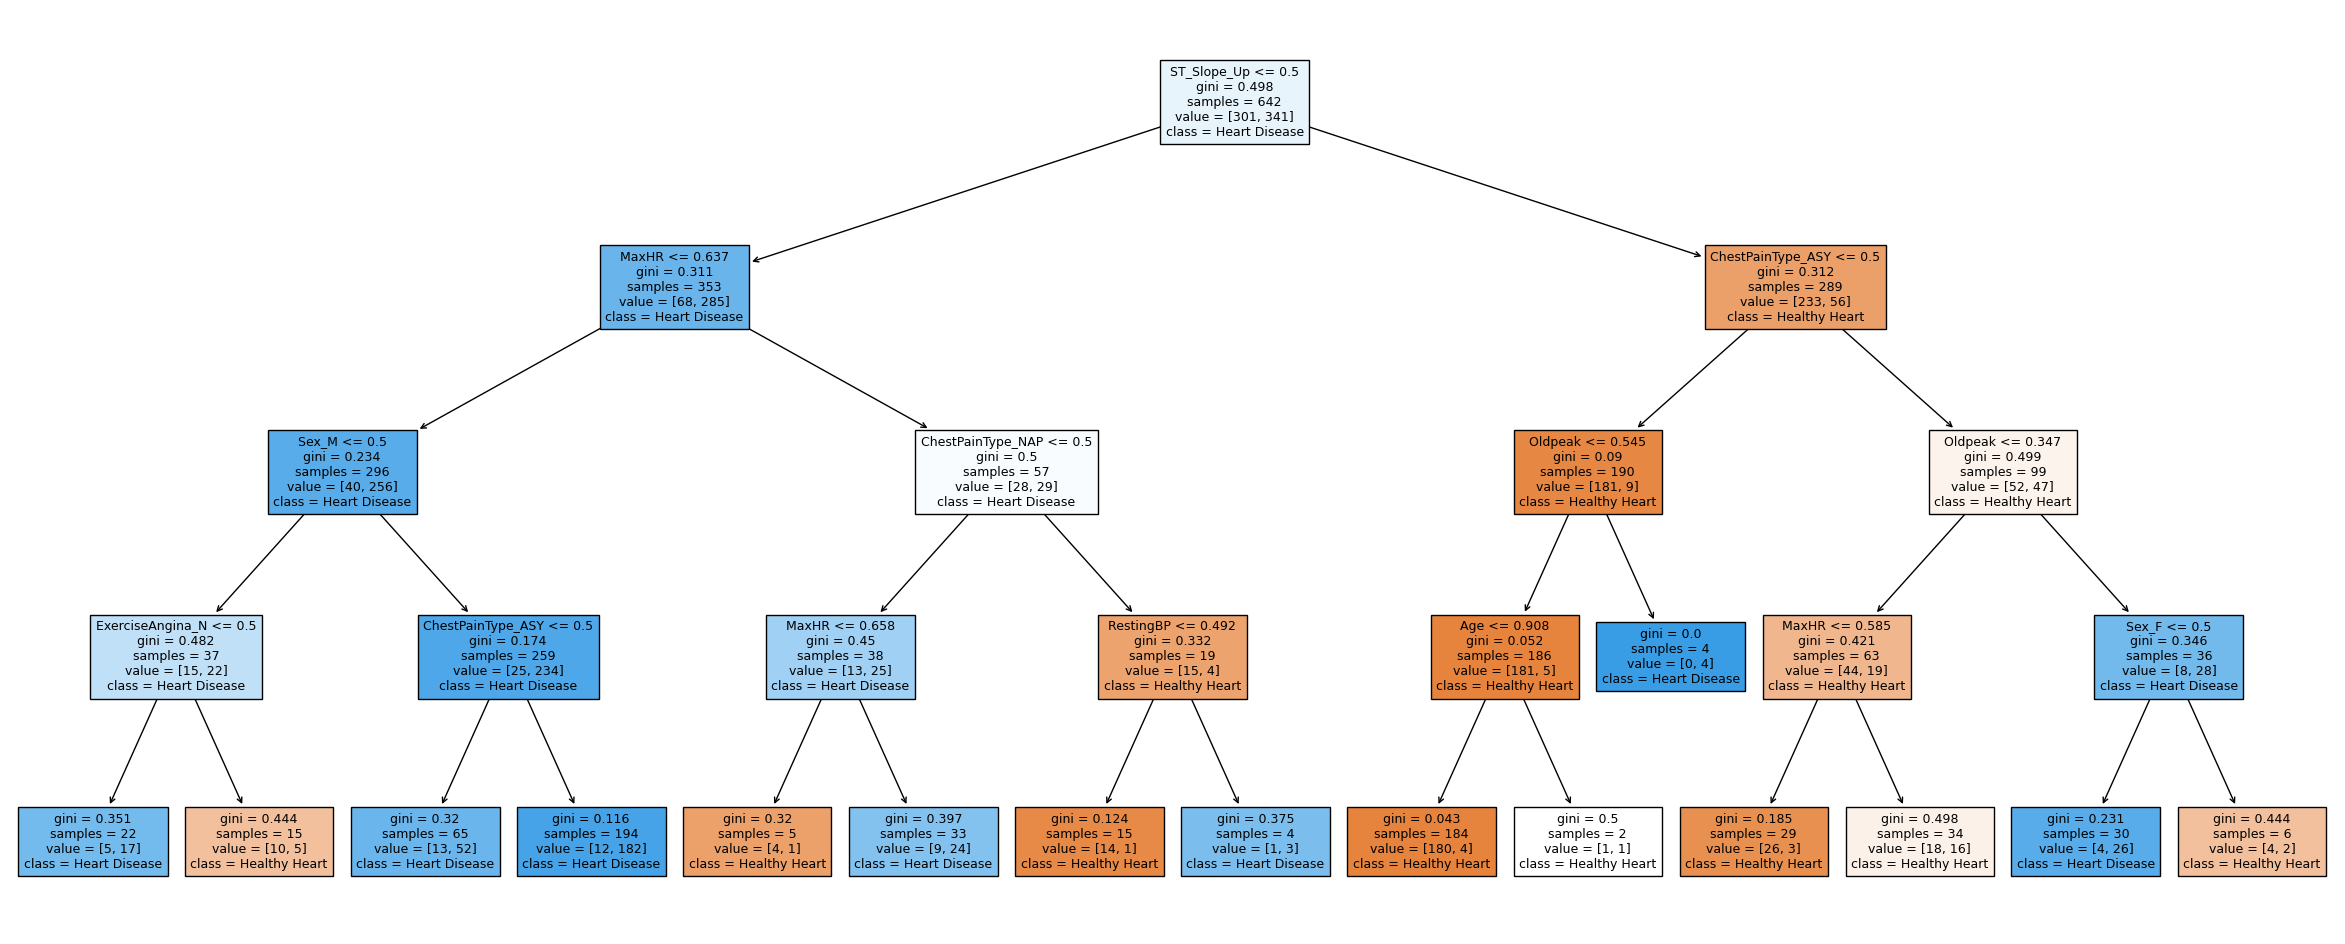

In [18]:
data_features = list(X_train.columns)
data_class = ['Healthy Heart','Heart Disease']

plt.figure(figsize=(30,12)) # You may need to adjust this value to get the tree to fit on your screen
plot_tree(tree_d, feature_names = data_features,class_names=data_class, filled=True, fontsize=9)

#### 2d. Part I Answer

The three most importat features to predict heart disease (i.e. the most top level features/ first ones that the tree split based upon) are ST_Slope (particulary whether or not it's result is "up"), ChestPainType (whether or not it was "ASY"), and MaxHR.

#### 2d. Part II Answer

if ST_Slope_Up <= 0.5:
    if MaxHR <= 0.637:
        if Sex_M <= 0.5:
            if ExerciseAngina <= 0.5:
                class = Healthy Heart
            else:
                class = Heart Disease
        else:                                      #Heart Disease either way...
            class = Heart Disease
    else:
        if ChestPainType_NAP <= 0.5:
            if MaxHR <= 0.658:
                class = Healthy Heart
            else:
                class = Heart Disease
        else:
            if RestingBP <= 0.492:
                class = Healthy Heart
            else:
                class = Heart Disease
else:
    if ChestPainType_ASY <= 0.545:
        if Oldpeak <= 0.373:
            class = Healthy Heart                  #Healthy Heart either way...
        else:
            class = Heart Disease                  #Heart Disease either way...
    else:
        if Oldpeak <= 0.347:
            class = Healthy Heart                  #Healthy Heart either way...
        else:
            if Sex_F <= 0.5:
                class = Heart Disease
            else:
                class = Healthy Heart

<h3 style="text-alight:left;"> 2e. <span style="float:right;"></span> </h3>

Write the code in the code cell beneath the heading ***2e. Code*** which enables you to test and evaluate the performance of decision tree models used for classifying people with or without heart disease. You should use this code to perform an experiment to find the best depth of a decision tree classification model. You should then explain your chosen best decision tree model in the markdown cell beneath the heading ***2e. Answer*** with respect to: its accuracy, over-fitting, features, true positives, and true negatives.

#### 2e. Code

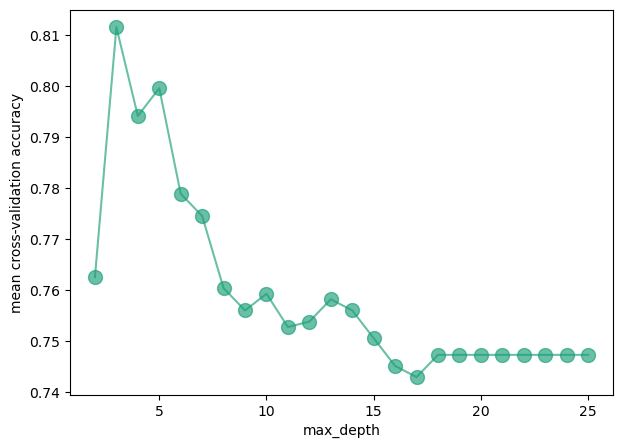

In [19]:
cv_scores = list()
depth_values = range(2,26)

for d in depth_values:
    t_model_k = DecisionTreeClassifier(max_depth = d,random_state=1)
    score = cross_val_score(t_model_k, X, y, cv=3, scoring='accuracy')
    # note: the whole datasets are passed to cross_val_score, not the previously partitioned training / testing data

    mean_score = score.mean()
    cv_scores.append(mean_score)
    
plt.figure(figsize=(7,5))
plt.plot(depth_values, cv_scores, '-o',markersize=10,alpha=0.65,color='#1b9e77')
plt.xlabel('max_depth')
plt.ylabel('mean cross-validation accuracy')
plt.show()

#### 2e. Answer

As shown in the graph, a max_depth of 3 gives us the best mean accuracy (it increases up to this depth then quickly drops). Adding levels past this point (3) increases complexity, decreases accuracy, and increases the chance of overfitting the training data (which worsens accuracy further). After the max_depth of 17, the accuracy stops fluctuating, which may mean the training data has been overfit.

<div class="alert alert-success" style="text-align:left;"><h2>3. Neural Networks<span style="float:right;"></span></h2></div>


This section concerns building and evaluating a neural network using `sklearn`, comparing and contrasting it with your Decision Tree method.

<h3 style="text-alight:left;"> 3a. <span style="float:right;"></span> </h3>

Write the code in the code cell beneath the heading ***3a. Code*** to build a neural network to predict the presence of heart disease in a patient. 
Briefly explain the parameters and values that you chose in the functions used in the markdown cell beneath the heading ***3a Answer***.

#### 3a. Code

In [20]:
mlp = MLPClassifier(hidden_layer_sizes=(4,3), max_iter=1000,random_state=1)
mlp.fit(X_train, y_train) 

MLPClassifier(hidden_layer_sizes=(4, 3), max_iter=1000, random_state=1)

#### 3a. Answer

In MLPClassifier, the hidden_layer_sizes hyperparameter specifies two hidden layers (one with 4 neurons and one with 3), and max_iter means training will only run for a maximum of 1000 epochs and, if not converged, will then terminate. This function uses some randomness too, hence the random_state parameter.

In mlp.fit, we parse in X_train and y_train for the training data.

<h3 style="text-alight:left;"> 3b. <span style="float:right;"></span> </h3>

Write the code in the code cell beneath the heading ***3b. Code*** to evaluate the neural network model that you built. Your code should output relevant statistics to show which of the decision tree and neural network models is better in terms of overall accuracy.

#### 3b. Code

In [21]:
y_predict = mlp.predict(X_test) # use our trained network to predict labels for the test data
print('Testing accuracy: \t', metrics.accuracy_score(y_test, y_predict)) # calculate the accuracy by comparing the true labels (y_test) to the predicted labels (y_predict)

Testing accuracy: 	 0.8695652173913043


<h3 style="text-alight:left;"> 3c. <span style="float:right;"></span> </h3>

Compared to the decision tree model that you built, is your neural network model better at classifying people with heart disease, or better at classifying people without heart disease? 

You should write any code used for your evaluation in the code cell beneath the heading ***3c. Code*** and write into the markdown cell beneath ***3c. Answer*** to explain the reasons behind your answer. You should use a confusion matrix to support your answers.

#### 3c. Code

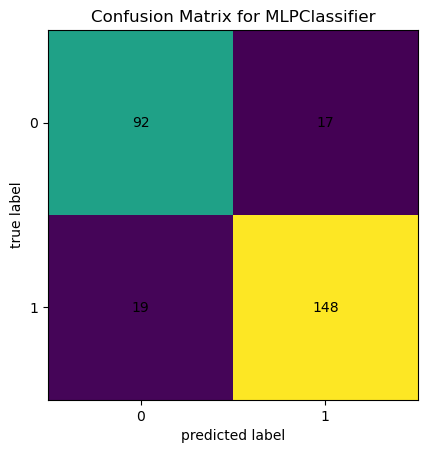

In [22]:
cm_mlp = metrics.confusion_matrix(y_test,y_predict) # calculate confusion matrix for the neural network
cf_matrix(cm_mlp,[0,1],'MLPClassifier') # plot the confusion matrix

#### 3c. Answer

The neural network model predicts no heart disease with 84.40% accuracy (since it misclassifies 17 and correctly classifies 92), which is better than 83.49% accuracy of the decision tree.

It predicts heart disease with 88.62% (it misclassifies only 19 and correctly predicts 148), which is better than 85.03%, the accuracy of the decision tree.

So, in both cases, the neural network is more accurate; and, in both models, the presence of heart disease is more accurately predicted than no heart disease.

<h3 style="text-alight:left;"> 3d. <span style="float:right;"></span> </h3>

How would you suggest improving the accuracy of predicting the presence of heart disease in new patients? Briefly explain in the markdown cell beneath the heading ***3d. Answer*** any potential strategies you could use to improve the model's performance on unseen data. Your answer should make particular reference to any shortcomings of the training dataset used for this coursework.

#### 3d. Answer

The large number of NULL values in the data set puts the data at a disadvantage; while the median is sufficient to fill them in, it results in a less accurate data set since the real values are unknown.

A work-around could be to provide a model for filling with median, filling with mean and dropping the null rows, to work out the most accurate method.